In [1]:
import tmplot as tmp
import bitermplus as btm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [45]:
df = pd.read_csv('C:\\D盘\\COVID-19 rumors-debunking\\data_clean_classification\\data\\original_data.csv')
df.columns

C:\Users\qqcom\AppData\Local\Temp\ipykernel_13724\3364408332.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\D盘\\COVID-19 rumors-debunking\\data_clean_classification\\data\\original_data.csv')


Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut'],
      dtype='object')

In [3]:
df_unique = df.drop_duplicates(subset='原文博文内容')
df_unique.shape

(15337, 40)

In [4]:
texts = df_unique['cut'].str.strip().tolist()

## BTM

In [5]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)
docs_vec = btm.get_vectorized_docs(texts, vocabulary)
biterms = btm.get_biterms(docs_vec)

In [6]:
display(len(texts),len(docs_vec),len(biterms))

15337

15337

15330

In [9]:
# finding best topic_num
   
metrics=[]
for topic_num in range(2,16):
    print(topic_num)
    model = btm.BTM(X, vocabulary, seed=12321, T=topic_num, M=20, alpha=50/10, beta=0.01)
    model.fit(biterms, iterations=20)
    p_zd = model.transform(docs_vec)
    # Get a phi matrix
    #phi = tmp.get_phi(model)
    #entropy = tmp.entropy(phi)
    perplexity = model.perplexity_
    print(perplexity)
    coherence = model.coherence_
    print(coherence)
    metrics.append([topic_num,perplexity,coherence])
metrics=pd.DataFrame(metrics)
metrics.columns=['Topic number', 'perplexity','coherence']
metrics['coherence mean']=[np.mean(x) for x in metrics['coherence'].tolist()]

2


100%|██████████| 15337/15337 [00:00<00:00, 34911.16it/s]


4789.102313657949
[-295.55448258 -420.2556481 ]
3


100%|██████████| 15337/15337 [00:00<00:00, 32711.48it/s]


4256.377807748614
[-342.98706729 -293.27897728 -430.34573335]
4


100%|██████████| 15337/15337 [00:00<00:00, 29294.15it/s]


4029.7091778556132
[-352.85070959 -276.57202619 -339.12409237 -423.74308747]
5


100%|██████████| 15337/15337 [00:00<00:00, 23688.65it/s]


3851.720117121408
[-392.42349741 -409.27467419 -306.04586753 -289.27974185 -450.67416656]
6


100%|██████████| 15337/15337 [00:00<00:00, 19996.83it/s]


3602.087627873698
[-386.20174394 -337.22017328 -282.49623266 -344.89295338 -446.67175066
 -444.79819591]
7


100%|██████████| 15337/15337 [00:00<00:00, 19682.98it/s]


3557.9163543093555
[-261.57020818 -330.03952028 -368.74186363 -334.78934758 -377.6607668
 -467.41389194 -409.25041679]
8


100%|██████████| 15337/15337 [00:00<00:00, 19218.72it/s]


3485.6529873355503
[-397.17253236 -338.94184877 -362.22923638 -266.9226521  -392.31125995
 -408.36468765 -474.43873205 -361.10843494]
9


100%|██████████| 15337/15337 [00:00<00:00, 17326.83it/s]


3418.4552967698623
[-307.73126445 -389.3415344  -347.17201557 -295.22161049 -349.45474382
 -355.11787453 -428.75320604 -475.95476229 -407.95093268]
10


100%|██████████| 15337/15337 [00:00<00:00, 16583.71it/s]


3309.2974188268754
[-284.13464378 -407.29640746 -342.28914464 -380.13895754 -326.84988637
 -433.1773267  -313.63392717 -433.14726857 -491.55106362 -460.8944009 ]
11


100%|██████████| 15337/15337 [00:01<00:00, 14819.80it/s]


3309.5478849788024
[-375.35594303 -377.29692583 -423.60798582 -358.95179995 -266.15205208
 -340.4804258  -387.26852597 -413.25428495 -461.41944842 -413.13680133
 -351.00028611]
12


100%|██████████| 15337/15337 [00:01<00:00, 13829.03it/s]


3195.8180513503157
[-359.79232149 -361.90861063 -350.02381749 -366.72870216 -277.31749237
 -333.32220597 -364.38571206 -377.43595712 -451.49732335 -433.85011766
 -420.15222401 -342.56462262]
13


100%|██████████| 15337/15337 [00:01<00:00, 12088.60it/s]


3139.0873504330057
[-364.16425226 -443.7112475  -329.25262226 -347.18701264 -416.90447295
 -267.48940409 -348.30314261 -373.4740451  -405.0010659  -444.54574879
 -414.73446837 -445.92168031 -398.51014715]
14


100%|██████████| 15337/15337 [00:01<00:00, 11783.85it/s]


3065.0882553837127
[-377.68305183 -456.15142863 -344.44351158 -312.1546774  -420.40058194
 -269.08740441 -335.18997432 -339.41462645 -396.65261097 -424.62368687
 -446.63411237 -456.79234749 -449.67386294 -400.02681963]
15


100%|██████████| 15337/15337 [00:01<00:00, 11002.97it/s]


3070.8812451256817
[-355.17400321 -476.43140053 -412.81695603 -384.65933696 -413.6770788
 -449.35327732 -383.43876873 -323.94558388 -381.86387467 -319.27275273
 -429.62407547 -463.31938734 -454.04615857 -458.98360655 -291.20520408]


In [10]:
display(pd.DataFrame(metrics)) 

,Topic number,perplexity,coherence,coherence mean
0,2,4789.102314,"[-295.55448257943715, -420.2556480954979]",-357.905065
1,3,4256.377808,"[-342.9870672897525, -293.27897728259575, -430...",-355.537259
2,4,4029.709178,"[-352.85070959449416, -276.5720261854081, -339...",-348.072479
3,5,3851.720117,"[-392.42349740874295, -409.2746741889985, -306...",-369.539590
4,6,3602.087628,"[-386.20174394462566, -337.2201732823777, -282...",-373.713508
5,7,3557.916354,"[-261.57020817770206, -330.0395202788033, -368...",-364.209431
6,8,3485.652987,"[-397.1725323572866, -338.9418487699766, -362....",-375.186173
7,9,3418.455297,"[-307.7312644462047, -389.3415343994995, -347....",-372.966438
8,10,3309.297419,"[-284.1346437788077, -407.2964074610254, -342....",-387.311303
9,11,3309.547885,"[-375.35594303333284, -377.29692583294644, -42...",-378.902225


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

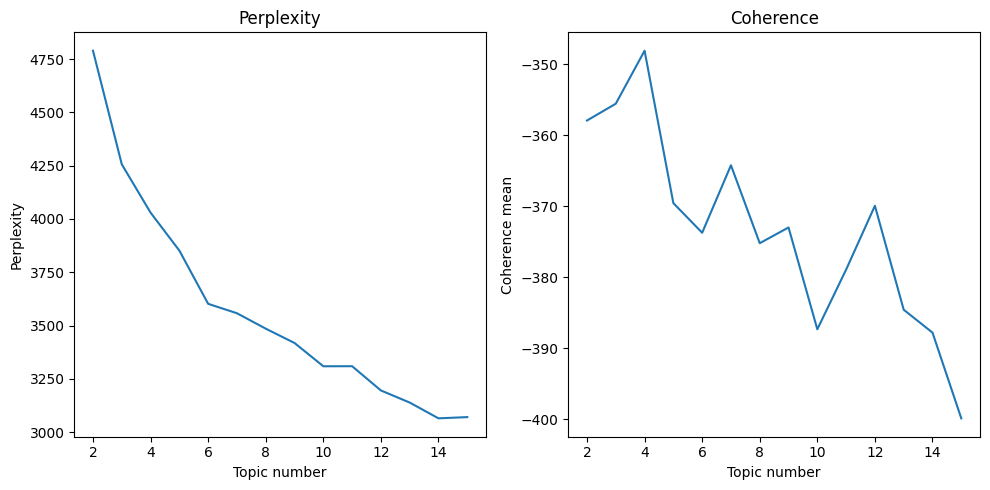

In [12]:
x = metrics['Topic number']
y_perplexity = metrics['perplexity']
y_coherence = metrics['coherence mean']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.plot(x, y_perplexity)
ax1.set_title('Perplexity')
ax1.set_xlabel('Topic number')
ax1.set_ylabel('Perplexity')

ax2.plot(x, y_coherence)
ax2.set_title('Coherence')
ax2.set_xlabel('Topic number')
ax2.set_ylabel('Coherence mean')

plt.tight_layout()

plt.show()


In [13]:
optimal_topic_number = 4
model = btm.BTM(X, vocabulary, seed=12321, T=optimal_topic_number, M=20, alpha=50/10, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

100%|██████████| 15337/15337 [00:00<00:00, 29761.62it/s]


In [14]:
#tmp.report(model=model, docs=texts)

In [35]:
df_words_topics = model.df_words_topics_
df_words_topics.loc['病例', 0]

0.01630637233509915

In [98]:
from googletrans import Translator

In [101]:
top_words = btm.get_top_topic_words(
    model,
    words_num=40,
    topics_idx=[0,1,2,3])
df_top_words = pd.DataFrame(top_words)
df_top20_words = df_top_words.head(20)
df_transposed = df_top20_words.transpose()

#translate
translator = Translator(service_urls=['translate.google.com'])
def translate_word(word):
    translation = translator.translate(word, dest='en')
    return translation.text

#合并所有列，逗号连接
def merge_row(row):
    return ', '.join(str(cell) for cell in row)

df_translated = df_transposed.applymap(translate_word)
df_translated['merged'] = df_translated.apply(merge_row, axis=1)

df_translated.to_csv('C:\\D盘\\COVID-19 rumors-debunking\\biterm\\data\\top20_words_topics.csv', encoding='utf-8-sig', index=True)

In [17]:
df_list = top_words.values.flatten().tolist() #把表格中的top词变成list
unique_list = list(set(df_list))  #去重
values_to_remove = ['新冠','肺炎','病毒','新型','冠状病毒'] #删除频率过高的词
unique_list = [x for x in unique_list if x not in values_to_remove]
len(unique_list) #词的个数

113

In [47]:
top_word_dict = {}
for word in unique_list:   
    weight = df_words_topics.loc[word].sum()
    top_word_dict[word] = weight

sorted_dict = dict(sorted(top_word_dict.items(), key=lambda x: x[1], reverse= True))
print(sorted_dict)

{'上海': 0.029431119889725132, '视频': 0.023363917919539224, '防控': 0.02305069809322942, '确诊': 0.021315173501988978, '病例': 0.02100745392595066, '核酸': 0.018541991259433444, '检测': 0.018013200967500854, '医院': 0.016538049278811466, '传播': 0.015855621938712594, '目前': 0.015658695793308988, '隔离': 0.01564659951941724, '进行': 0.015011280211729304, '人员': 0.01459625152570304, '工作': 0.014345762126345868, '网络': 0.014033413807453345, '感染': 0.013985556665263512, '中国': 0.012851453304516371, '情况': 0.012574820664016408, '武汉': 0.012339385725440258, '发现': 0.01182253067059631, '传谣': 0.010528328427060698, '物资': 0.010177062049181597, '官方': 0.010095519836668468, '口罩': 0.010094953991249331, '阳性': 0.00996780656000816, '表示': 0.009548543350242193, '市民': 0.009441664667117487, '小区': 0.009272418656860716, '警方': 0.009217410949319162, '广大': 0.009130636960340988, '网民': 0.009073232420377393, '疫苗': 0.009037985784128866, '患者': 0.008671239561650897, '近日': 0.008617683801436148, '不信谣': 0.008606283482242523, '核实': 0.0084787831057859

#### Translate Chinese words to English

In [48]:
from googletrans import Translator

In [49]:
translator = Translator()
english_dict = {}
for key in sorted_dict:
    chinese_text = key
    result = translator.translate(chinese_text, dest='en')
    english_text = result.text
    english_dict[english_text] = sorted_dict[key]

print(english_dict)

{'Shanghai': 0.029431119889725132, 'video': 0.023363917919539224, 'Prevent and control': 0.02305069809322942, 'Diagnosis': 0.021315173501988978, 'Pathogenesis': 0.02100745392595066, 'Nucleic acid': 0.018541991259433444, 'Test': 0.018013200967500854, 'Hospital': 0.016538049278811466, 'spread': 0.005366992948992075, 'at present': 0.015658695793308988, 'isolation': 0.01564659951941724, 'conduct': 0.015011280211729304, 'personnel': 0.01459625152570304, 'Work': 0.014345762126345868, 'network': 0.014033413807453345, 'Infect': 0.013985556665263512, 'China': 0.012851453304516371, 'Condition': 0.012574820664016408, 'Wuhan': 0.012339385725440258, 'Discover': 0.01182253067059631, 'Rumor': 0.010528328427060698, 'Material': 0.010177062049181597, 'official': 0.010095519836668468, 'Face mask': 0.010094953991249331, 'Positive': 0.00996780656000816, 'express': 0.009548543350242193, 'Citizen': 0.009441664667117487, 'Community': 0.00692237299684424, 'police': 0.009217410949319162, 'Vast': 0.0091306369603

### WordCloud of top words in BTM

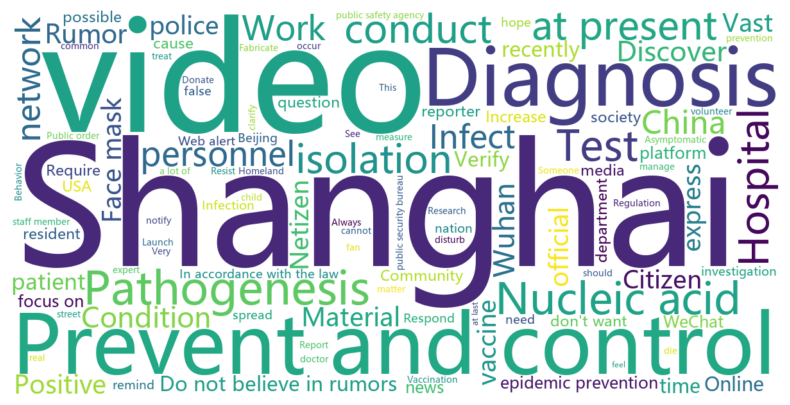

In [55]:
# 创建词云对象
wordcloud = WordCloud(width=1200, height=600, background_color='white', font_path="msyh.ttc")

# 生成词云图
wordcloud.generate_from_frequencies(english_dict)

# 显示词云图
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('C:\\D盘\\COVID-19 rumors-debunking\\biterm\\vis\\english_wordcloud.png', dpi=300)
plt.show()

In [56]:
len(model.labels_)

15337

In [57]:
df_text_label = btm.get_docs_top_topic(texts, model.matrix_docs_topics_)
df_text_label

,documents,label
0,传染病 专家 印度 感染 新冠 去世 此前 注射 两针 疫苗 美国 总统 顾问 委员会 成员...,0
1,朱易 朱易 女单 自由滑 朱易 冬奥会 首秀 朱易 冬奥 花滑 女单 名额 选拔 真相 朱易...,0
2,等待 装卸 船舶 数量 飙升 多艘 上港 集团 上海港 运营 如常 未见 拥堵 集团 近期 ...,1
3,上海 私信 一份 署名 幸福 小镇 业委会 澄清 文中 黄河 教授 人高马大 身强体壮 黄河...,2
4,终于 确诊 去年底 兰州 研所 发生 感染 事件 今年 不断 居民 医院 确诊 感染 布病 ...,0
...,...,...
15332,看到 多家 银行 河南 村镇 银行 无法 取款 事件 中小银行 造成 挤兑 现象 时间 推移...,1
15333,遇事 说理 香辣 快乐 星球 深圳市 宝安区 解封 新安 街道 经济 活动 恢复正常 茶店 ...,2
15334,核酸 嗓子 舒服 医务 工作者 操作 不当 核酸 纤维 有毒 有害物质,3
15335,上海理工大学 外省 隔离 学生 江苏 隔离 浙江 发声 助力 台州 临海 华侨 大酒店,2


In [58]:
df_unique = df_unique.reset_index(drop=True)
df_unique.columns

Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut'],
      dtype='object')

In [59]:
merged_df = pd.merge(df_unique, df_text_label, left_index=True, right_index=True)
merged_df.columns

Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut', 'documents', 'label'],
      dtype='object')

In [60]:
merged_original_df = pd.merge(df, merged_df[['原文博文内容', 'label']], how='left')
merged_original_df.columns

Index(['博文ID', '博文链接', '博文内容', '博文关联话题', '博文发布时间', '博文图片链接', '博文转发量', '博文评论量',
       '博文点赞量', '博主ID', '博主名称', '博主链接', '博主图像', '博主简介', '博主关注数', '博主粉丝数',
       '博主博文数', '博主性别', '博主认证信息', '原文博文ID', '原文博文链接', '原文博文内容', '原文博文关联话题',
       '原文博文发布时间', '原文博文图片链接', '原文博文转发量', '原文博文评论量', '原文博文点赞量', '原文博主ID',
       '原文博主名称', '原文博主链接', '原文博主图像', '原文博主简介', '原文博主关注数', '原文博主粉丝数', '原文博主博文数',
       '原文博主性别', '原文博主认证信息', 'pred_classify', 'cut', 'label'],
      dtype='object')

In [61]:
merged_original_df['label'].isnull().sum()

0

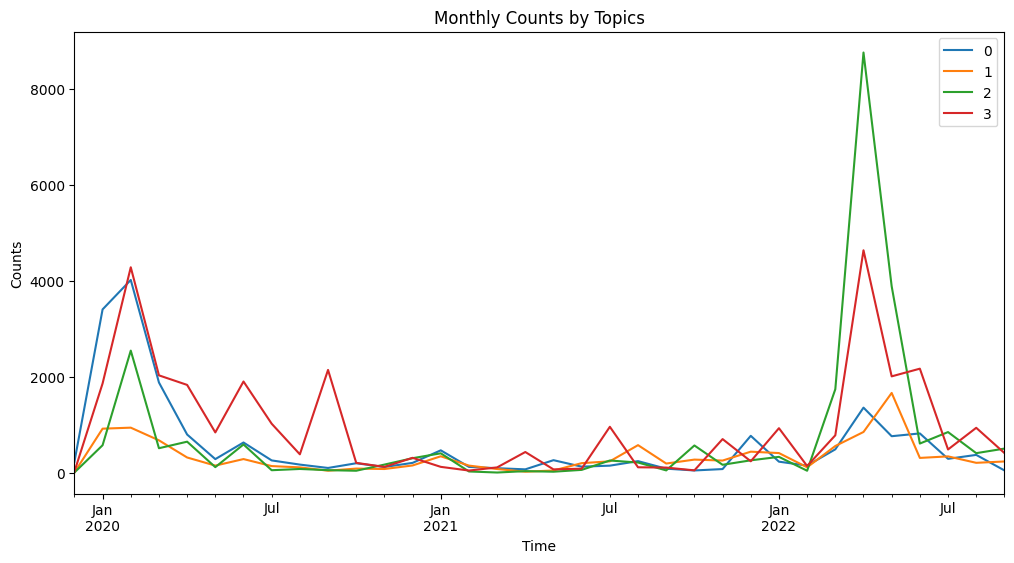

<Figure size 640x480 with 0 Axes>

In [97]:
merged_original_df['博文发布时间'] = pd.to_datetime(merged_original_df['博文发布时间'])
df_vis = merged_original_df[['博文发布时间', 'label']]
df_vis.set_index('博文发布时间', inplace=True)
grouped = df_vis.groupby('label')
fig, ax = plt.subplots(figsize=(12,6))
for label, group in grouped:
    monthly_counts = group.resample('M').size()
    monthly_counts.plot(ax=ax, label=label)

plt.title('Monthly Counts by Topics')
plt.xlabel('Time')
plt.ylabel('Counts')

# 添加图例
plt.legend()

# 显示图形
plt.show()
plt.savefig('C:/D盘/COVID-19 rumors-debunking/biterm/vis/Monthly_counts_by_topics.png',dpi=300)

In [85]:
grouped.size

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001F5359C4450>>

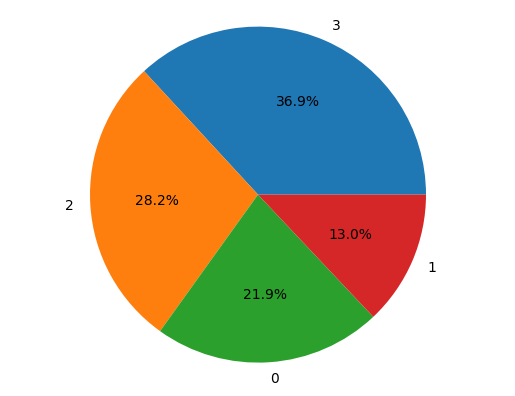

In [63]:
data = merged_original_df['label']
counts = pd.Series(data).value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [64]:
merged_original_df.to_csv('C:\\D盘\\COVID-19 rumors-debunking\\biterm\\data\\data_with_topic_labels.csv', encoding = 'utf-8-sig', index=False)